In [5]:
import pickle
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': [15, 10]}, font_scale=1.2)
from datasist.structdata import detect_outliers
import re

In [6]:
strp={'شقة', 
'فيلا', 
'هاوس',
'تاون',
'توين',
'فى',
'و'
'علي'
'التجمع',
'in',
'فيو',
'م'
'في',
' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '\xa0',
 '²',
 '»',
 'Ã',
 'ã',
 '،',
 '\u061c',
  '؟', '\u200e',
 '\u200f',
 '–',
 '’',
 '“',
 '”',
 '•',
 '⁸',
 '我'}

In [7]:
with open("./apartmant.pkl",'rb') as file:
        apartmant,stack2,link2=pickle.load(file)
df=pd.DataFrame(apartmant)
df.rename(columns={'data': 'date'},inplace=True, errors='raise')
df['cat']='Sell'

len(apartmant)

20317

***Cleaning***


In [8]:
df['date']=df['date'].apply(lambda x: x.strip())
df['date']=pd.to_datetime(df['date'], format="%d %B %Y")
df['month']= pd.DatetimeIndex(df['date']).month

In [9]:
z=list(df.columns)
x=['price','location','date','title','link','viwers','negotiable','cat','month']
selected=[i for i in z if i not in x ]
selected

['Bedrooms',
 'Bathrooms',
 'Area (m²)',
 'Level',
 'Type',
 'Payment Option',
 'Amenities',
 'Furnished',
 'Delivery Date',
 'Compound',
 'Delivery Term',
 'Down Payment']

In [10]:
for i in selected:
    print(df[i].value_counts())
    print("*"*80)

[3]      12292
[2]       5551
[4]       1630
[1]        520
[5]        221
[6]         63
[7]         15
[8]         10
[10+]        9
[10]         4
[9]          2
Name: Bedrooms, dtype: int64
********************************************************************************
[2]      7675
[1]      6778
[3]      5249
[4]       521
[5]        56
[6]        18
[8]         7
[7]         6
[10]        4
[10+]       2
[9]         1
Name: Bathrooms, dtype: int64
********************************************************************************
[120]        743
[140]        742
[100]        665
[150]        647
[90]         628
            ... 
[367]          1
[805,000]      1
[5,000]        1
[166.44]       1
[388]          1
Name: Area (m²), Length: 437, dtype: int64
********************************************************************************
[2]          4189
[3]          3396
[1]          2951
[Ground]     2761
[4]          2011
[5]          1512
[6]           771
[7]           573
[10+]

In [11]:
def xx (z):
    try:
        return ' '.join(str(e) for e in z)
    except Exception as e:
        
        return np.nan
     
for i in selected:
    df[i]=df[i].apply(xx)

In [12]:
df['Amenities']

0                                                      NaN
1        Balcony Built in Kitchen Appliances Private Ga...
2        Balcony Covered Parking Maids Room Pets Allowe...
3        Balcony Private Garden Security Covered Parkin...
4                                                      NaN
                               ...                        
20312                                                  NaN
20313                                             Elevator
20314               Security Electricity Meter Water Meter
20315    Balcony Covered Parking Pets Allowed Security ...
20316                                                  NaN
Name: Amenities, Length: 20317, dtype: object

In [13]:
for i in selected:
    print(i)
    print(df[i].unique())
    print("*"*80)

Bedrooms
['3' '2' '4' '5' '6' '1' '10+' '7' '8' '10' '9']
********************************************************************************
Bathrooms
['2' '4' '3' '1' '5' '7' '6' '10+' '8' '10' '9']
********************************************************************************
Area (m²)
['160' '119' '130' '320' '115' '250' '136' '175' '172' '134' '310' '220'
 '210' '110' '200' '233' '170' '180' '156' '140' '265' '240' '360' '219'
 '165' '135' '154' '196' '194' '107' '162' '224' '199' '145' '178' '75'
 '120' '188' '80' '186' '112' '155' '97' '116' '521' '65' '143' '150'
 '100' '125' '131' '189' '106' '190' '85' '185' '96' '50' '55' '148' '67'
 '276' '300' '63' '235' '206' '202' '238' '124' '129' '60' '95' '114'
 '205' '315' '146' '137' '90' '132' '81' '94' '105' '355' '72' '70' '215'
 '212' '74' '10' '158' '91' '174' '127' '157' '280' '191' '153' '230'
 '108' '1,000' '69' '177' '118' '340' '58' '260' '126' '64' '56' '68'
 '350' '78' '168' '164' '123' '77' '128' '278' '54' '580' '103' '

In [14]:
df['Delivery Date'].value_counts()

Ready to move      9990
soon                923
2024                682
2023                495
2022                283
within 6 months     265
2025                255
2026                 44
2029                  3
2030                  1
2028                  1
Name: Delivery Date, dtype: int64

In [15]:
def date(words):
  chars=[{'ا', 'ل', 'ن'}, {'ر', 'ف', 'و', 'ي'}, {'ا', 'ت', 'س', 'ل', 'م'}]
  x=[{x for x in i if i not in strp}for i in words.split(" ")]
  for i in x:
        if set(chars[2]).issubset(i) and re.search(r'(\d{4})',words):
                  return re.findall(r'(\d{4})',words)[0]
        if set(chars[0]).issubset(i) or set(chars[1]).issubset(i):
              return 'Ready to move'

  return np.nan
df.loc[df['Delivery Date'].isnull(),'Delivery Date']=df.loc[df['Delivery Date'].isnull(),'title'].apply(date)

In [16]:
df['Delivery Date']

0                  NaN
1        Ready to move
2        Ready to move
3                  NaN
4        Ready to move
             ...      
20312              NaN
20313              NaN
20314    Ready to move
20315    Ready to move
20316    Ready to move
Name: Delivery Date, Length: 20317, dtype: object

In [17]:
df.loc[df['Delivery Date']=='2027','Delivery Date']='2026'

In [18]:
df.loc[df['Delivery Date'].isin(['1050',                 
'4750'  ,               
'8500' ,                
'١١٢٣' ,                
'1000' ,                
'1500' ,                
'2500' ,                  
'٢٠٢٧' ,                
'7920' ,                
'٢٠٢١']),'Delivery Date']=np.nan

In [19]:
def counter(z,sep):
    from collections import Counter
    sv=[]
    for i in z:
        for i in i.split(sep):
            if i not  in strp:
                sv.append(i)
    return dict(sorted(dict(Counter(sv)).items(), key=lambda item: item[1],reverse=True))

In [20]:
counter(df['title'],' ')

{'للبيع': 10583,
 'شقه': 7224,
 'في': 4916,
 'متر': 1881,
 'من': 1565,
 'لوكس': 1436,
 'كمبوند': 1245,
 'سوبر': 1237,
 'الخامس': 1188,
 'التجمع': 1170,
 'استلام': 1152,
 'علي': 1091,
 'م': 1091,
 'شارع': 1079,
 'تشطيب': 1008,
 'على': 975,
 'فوري': 906,
 'بسعر': 898,
 'مميز': 893,
 'بمقدم': 892,
 'بالتقسيط': 772,
 'بكمبوند': 751,
 'و': 746,
 'دوبلكس': 705,
 'اكتوبر': 696,
 'امتلك': 630,
 'زايد': 626,
 'لقطه': 591,
 'شقتك': 589,
 'سنوات': 586,
 'دور': 577,
 'موقع': 572,
 'بجوار': 550,
 'جاردن': 521,
 'الجديدة': 487,
 'سعر': 462,
 'الحي': 456,
 'مقدم': 455,
 'امام': 451,
 'سنين': 448,
 'لقطة': 446,
 'الشيخ': 432,
 'المالك': 410,
 'ارضي': 402,
 'بالتجمع': 398,
 'sale': 397,
 'فورى': 392,
 'مصر': 392,
 'for': 387,
 '6': 386,
 'جدا': 384,
 'مدينة': 382,
 'الف': 367,
 'Apartment': 365,
 'متشطبة': 363,
 'بجاردن': 358,
 'اول': 358,
 'ب': 349,
 'الجديده': 339,
 'ع': 338,
 'غرف': 331,
 'قسط': 328,
 '8': 327,
 'سوديك': 321,
 'تمليك': 320,
 '10%': 316,
 'نصر': 315,
 'الوطن': 312,
 'الرئيسي': 307,
 

In [21]:
chars=[{'ا','س','ت','ل','م'},{'ش','ا','ط','ب'},{'ق' ,'س','ط'},{'ك','ش','ا'}]
for  i in chars:
    print(i)

{'م', 'ل', 'س', 'ا', 'ت'}
{'ط', 'ش', 'ا', 'ب'}
{'ط', 'س', 'ق'}
{'ك', 'ش', 'ا'}


In [22]:
df['Payment Option'].value_counts()
df['Payment Option'].isnull().sum()

3940

In [23]:
def cash_extractor(words):
  if pd.notnull(words) or pd.notna(words):
    chars=[{'ق' ,'س','ط'},{'م','ق','د'}]
    x=[{x for x in i if i not in strp}for i in words.split(" ")]
    for i in x:
          if set(chars[0]).issubset(i) or set(chars[1]).issubset(i):
                return 'Installment'
    return 'Cash'
  else:
    return np.nan
df.loc[df['Payment Option'].isnull(),'Payment Option']=df.loc[df['Payment Option'].isnull(),'title'].apply(cash_extractor)

In [24]:
def extr(i):      
      if 'نص' in i and 'شطيب' in i or 'متشطب'in i:
        return 'Semi Finished'
      elif 'شطيب' in i or 'متشطب'in i  and ('سوبر' in i or 'فرش' in i or 'مفتاح' in i or 'كامل' in i or  'لوكس'in i or 'الترا'in i or'مميز' in i or'ممتاز' in i or'راقي' in i):
             return 'Finished' 
df[df['Delivery Term'].isnull()]['Delivery Term']=df[df['Delivery Term'].isnull()]['title'].apply(extr)

C:\Users\Moham\AppData\Local\Temp\ipykernel_17496\780014698.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Delivery Term'].isnull()]['Delivery Term']=df[df['Delivery Term'].isnull()]['title'].apply(extr)


In [23]:
def x(z):
    if z=='10+':
            return 10
    else:  
        try:
            return int(z)
        except Exception as e:
            print(e)
            return z
    
df['Bathrooms']=df['Bathrooms'].apply(x)
df['Bedrooms']=df['Bedrooms'].apply(x)

In [24]:
def x(z):
    try:
        x=''
        if type(z)==str: 
            for i in z:
                if  i.isdigit():
                    x+=i
            return int(x)
        elif type(z)==list:
            print(z,'list')
            for i in z[0]:
                if i.isdigit():
                    x+=i
            return int(x)
        else:
            return np.nan
    except:
        return np.nan
df['price']=         df['price'].apply(x)
df['Area (m²)']=     df['Area (m²)'].apply(x)
df['Area (m²)']=     df['Area (m²)'].astype(int)
df['negotiable'] =   df['negotiable'].astype(int)
df['viwers'] =       df['viwers'].astype(int)

In [26]:
def x(z):
    try:
        return int(z)
    except:
        if z=='Ground':
            return 0
        elif z=='Highest':
            return 11
        elif z=='10+':
            return 10
        else:
            print(z)
            return z

df['Level']=df['Level'].apply(x)

In [28]:
df['price']

0        2,560,000 EGP
1        1,650,000 EGP
2        2,380,000 EGP
3          665,000 EGP
4        3,900,000 EGP
             ...      
20312    1,750,000 EGP
20313      900,000 EGP
20314    1,850,000 EGP
20315    1,980,000 EGP
20316      305,000 EGP
Name: price, Length: 20317, dtype: object

***Fill_Nulls***

In [29]:
for i ,v in df[df['Compound']=='Madinaty']['Amenities'].value_counts().iloc[[2]].items():
    items=i
items

'Balcony Security'

In [30]:
# st=set()
# [[st.add(z) for  z in i.split() ]for i in [x for x in  df['Amenities'] if type(x)!=float ]]
# x=list(st)
# sub=['A/C','in','Meter','Private','Central','&','Built','Natural','Allowed', 'Room']
# Amenities={i:0 for  i in x}
# print(len(Amenities.keys()))
# for i in range(26):
#     print(0,',' ,end='')

In [31]:
rows=['Parking', 'Landline', 'Covered', 'A/C', 'Gas', 'Security', 'Natural', 'Water', 'Elevator', 'Pool', 'Built', 'Pets', 'Kitchen', 'Maids', 'Electricity', 'Garden', 'Balcony']
df[rows]=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [32]:
x=set(['Allowed', 'Elevator', 'Parking', 'heating', 'in', 'Private', 'Pets', 'Room', 'Electricity', 'Security', 'Natural', 'Appliances', 'Gas', 'A/C', 'Meter', 'Covered', 'Maids', 'Built', '&', 'Pool', 'Kitchen', 'Central', 'Balcony', 'Water', 'Garden', 'Landline'] ) ^ set(['Allowed','heating','in','Private','Room','Meter','&','Central','&','Appliances'])
print(x)

{'Pets', 'Landline', 'Garden', 'Covered', 'Kitchen', 'Pool', 'Maids', 'Parking', 'Built', 'Gas', 'Water', 'Natural', 'Elevator', 'Security', 'Electricity', 'Balcony', 'A/C'}


In [33]:
len2=len(df.columns)
{'&',
 'Allowed',
 'Appliances',
 'Central',
 'Meter',
 'Private',
 'Room',
 'heating',
 'in'}
['Allowed','heating','in','Private','Room','Meter','&','Central','Down Payment','&','Appliances']


['Allowed',
 'heating',
 'in',
 'Private',
 'Room',
 'Meter',
 '&',
 'Central',
 'Down Payment',
 '&',
 'Appliances']

In [34]:
finall_rows=[i for i in rows if i not in ['Allowed','heating','in','Private','Room','Meter','&','Central','Down Payment','&','Appliances']]
len(['Allowed','heating','in','Private','Room','Meter','&','Central','&','Appliances'])

10

In [35]:
def xvc(z):
    c={'in', 'Appliances', 'heating', 'Private', 'Central', 'Room', 'Allowed', '&', 'Meter'}
    m=['Parking', 'Landline', 'Covered', 'A/C', 'Gas', 'Security', 'Natural', 'Water', 'Elevator', 'Pool', 'Built', 'Pets', 'Kitchen', 'Maids', 'Electricity', 'Garden', 'Balcony']
    try:
        if z==np.nan:
            z=pd.Series([np.nan for i in m ])
            return z
        xxx=[]
        if type(z)==str:
            z=set(z.split())
            z= z ^ c
            for i in m:
                if i in z:
                    xxx.append(1)
                else:
                    xxx.append(0)
            return pd.Series(xxx)

        else:
            xxx=[np.nan for i in m ]
            return pd.Series(xxx)
    except Exception as e:
        print(e)
        xxx=[np.nan for i in m ]
        return pd.Series(xxx)   
df[rows]=df['Amenities'].apply(xvc)

In [38]:
df.isnull().sum()

price                 0
location              0
date                  0
title                 0
link                  0
viwers                0
negotiable            0
Bedrooms              0
Bathrooms             0
Area (m²)             0
Level                 0
Type                  1
Payment Option        0
Amenities          5999
Furnished          6764
Delivery Date      5684
Compound          14233
Delivery Term      9703
Down Payment      15504
cat                   0
month                 0
Parking            5999
Landline           5999
Covered            5999
A/C                5999
Gas                5999
Security           5999
Natural            5999
Water              5999
Elevator           5999
Pool               5999
Built              5999
Pets               5999
Kitchen            5999
Maids              5999
Electricity        5999
Garden             5999
Balcony            5999
dtype: int64

In [35]:
# df.drop('title',inplace=True,axis=1)
# df.drop('link',inplace=True,axis=1)

In [37]:
df['Delivery Term'].value_counts()

Finished         6267
Semi Finished    3094
Not Finished      691
Core & Shell      562
Name: Delivery Term, dtype: int64

In [39]:
def bbb(z):
    if z=="Finished":
        return 1      
    elif z== "Semi Finished":
        return 2    
    elif z=="Not Finished":
        return 3      
    elif z=="Core & Shell":
     return 4
    else:
        return z
df['Delivery Term']=df['Delivery Term'].apply(bbb)
df['Delivery Term'].value_counts()

1.0    6267
2.0    3094
3.0     691
4.0     562
Name: Delivery Term, dtype: int64

In [40]:
cats={'Cash or Installment': 1.0,
 'Cash':                          2.0, 
 'Installment':                   3.0}
print(df['Payment Option'].value_counts())
df['Payment Option']=df['Payment Option'].map(cats)

Cash                   13236
Cash or Installment     4814
Installment             2267
Name: Payment Option, dtype: int64


In [41]:
print(df['Delivery Term'].unique())


[nan  1.  2.  3.  4.]


In [43]:
cats2={'Ready to move': 1.0,
       'within 6 months': 2.0,
          'soon': 2.0,
          '2022': 2.0, 
          '2023': 3.0,    
          '2024': 4.0, 
          '2025': 5.0, 
          '2026': 6.0, 
     } 
df['Delivery Date']=df['Delivery Date'].map(cats2)
print(df['Delivery Date'].value_counts())

Ready to move      11671
soon                 923
2024                 682
2023                 496
2022                 285
within 6 months      265
2025                 255
2026                  44
2029                   3
٢٠٢٢                   1
٩٥٠٠                   1
3300                   1
3000                   1
1460                   1
3700                   1
1140                   1
2030                   1
2028                   1
Name: Delivery Date, dtype: int64


In [ ]:
df['2029'  ,
'٢٠٢٢'  ,
'٩٥٠٠'  ,
'3300'  ,
'3000'  ,
'1460'  ,
'3700'  ,
'1140'  ,
'2030'  ,
'2028'  ]

In [42]:
df['Delivery Date'].value_counts()

1.0    12933
2.0     1338
4.0      678
5.0      481
3.0      338
6.0      108
Name: Delivery Date, dtype: int64

In [43]:
df['Furnished'].value_counts()

No     12611
Yes     1235
Name: Furnished, dtype: int64

In [44]:
df['Furnished']=df['Furnished'].map({'No':0,'Yes':1})

In [45]:
compunes=df['Compound'].unique().tolist()

In [46]:
st=set()
for i in df[df['Compound'].isnull()]['location']:
    for x in compunes:
        if type(x) != float and x in i:
            st.add(i)
            continue 
st=list(st)

In [47]:
def x(z):
    if z['location']in st and pd.isnull(z['Compound']):
        return z['location'].split('،')[0]
    else:
        return np.nan
df.loc[df['Compound'].isnull(),'Compound']=df.apply(x,axis=1)

In [48]:
['Payment Option','Delivery Term','Furnished','Delivery Date']

['Payment Option', 'Delivery Term', 'Furnished', 'Delivery Date']

In [49]:
# cas=['كومبوند','كومباوند','كمباوند','compound','Compound']

# x=[]
# for i in df[df['Compound'].isnull()]['title']:
#     for ix in cas :
#         if ix in i:
#            x.append(i)
# counter(x,' ') 
# الياسمين
# Moon
# Palm
# باتيو
# ديفينا
# جاردنز
# هليوبوليس
# البروج
# Burouj
# Mivida

In [50]:
xv=list(df.columns)
column=xv[xv.index('Delivery Term'):]
column.remove('month')
column.remove('Amenities')
column.append('Payment Option')
column

['Delivery Term',
 'Furnished',
 'Delivery Date',
 'Parking',
 'Landline',
 'Covered',
 'A/C',
 'Gas',
 'Security',
 'Natural',
 'Water',
 'Elevator',
 'Pool',
 'Built',
 'Pets',
 'Kitchen',
 'Maids',
 'Electricity',
 'Garden',
 'Balcony',
 'Payment Option']

In [51]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer()
# df[column]= imputer.fit_transform(df[column])

# df[column]=df[column].apply(lambda x: round(x, 0))

# for col in column:
#     df[col] = df[col].astype('int')
    
# df.info()

In [52]:
df['Bedrooms'].value_counts()

4     8826
3     4968
5     4224
6     1798
10     684
7      618
8      235
2      168
9      135
1       47
Name: Bedrooms, dtype: int64

In [53]:
# z=[2,3,4,5,6,7,10]

# #level 1 = 3,4

# values=[1,1,2,3,4,5,6]

# dict(zip(z,values))
# 4
# 3
# 5
# 6
x={
   1:3,
   2:3,
   8:7,
   9:10,
   7:6}
for i,v in x.items():
    df['Bedrooms']=df['Bedrooms'].replace(i,v)
df['Bedrooms'].value_counts()

4     8826
3     5183
5     4224
6     2651
10     819
Name: Bedrooms, dtype: int64

In [54]:
{v:i+1 for i,v in enumerate(df['Bedrooms'].unique())}

{4: 1, 3: 2, 5: 3, 6: 4, 10: 5}

In [55]:
df['Bedrooms']=df['Bedrooms'].map({v:i+1 for i,v in enumerate(df['Bedrooms'].unique())})

In [56]:
df['Bedrooms'].value_counts()

1    8826
2    5183
3    4224
4    2651
5     819
Name: Bedrooms, dtype: int64

In [57]:
x={1:2,
   8:7,
   9:10,
   6:7}
for i,v in x.items():
    df['Bathrooms']=df['Bathrooms'].replace(i,v)
df['Bathrooms'].value_counts()

4     7550
3     6340
5     3637
7     2409
2     1162
10     605
Name: Bathrooms, dtype: int64

In [58]:
df['Bathrooms']=df['Bathrooms'].map({v:i+1 for i,v in enumerate(df['Bathrooms'].unique())})

In [59]:
df['Bathrooms'].value_counts()

1    7550
2    6340
6    3637
4    2409
3    1162
5     605
Name: Bathrooms, dtype: int64

In [60]:
df.reset_index(drop=True, inplace=True)

In [61]:
# idx = ["price","Area (m²)"]
# for col in idx:
#     outliers_indices = detect_outliers(df, 0, [col])
#     print(len(outliers_indices))
#     col_median = df[col].median()
#     df[col].iloc[outliers_indices] = col_median

In [62]:
# idx = ["price","Area (m²)"]
# for col in idx:
#     outliers_indices = detect_outliers(df, 0, [col])
#     print(len(outliers_indices))
#     col_median = df[col].median()
#     df[col].iloc[outliers_indices] = col_median

In [63]:
idx = ["price","Area (m²)"]
outliers_indices = detect_outliers(df, 0, idx)
df.drop(outliers_indices,inplace=True,axis=0)

<AxesSubplot:xlabel='Area (m²)'>

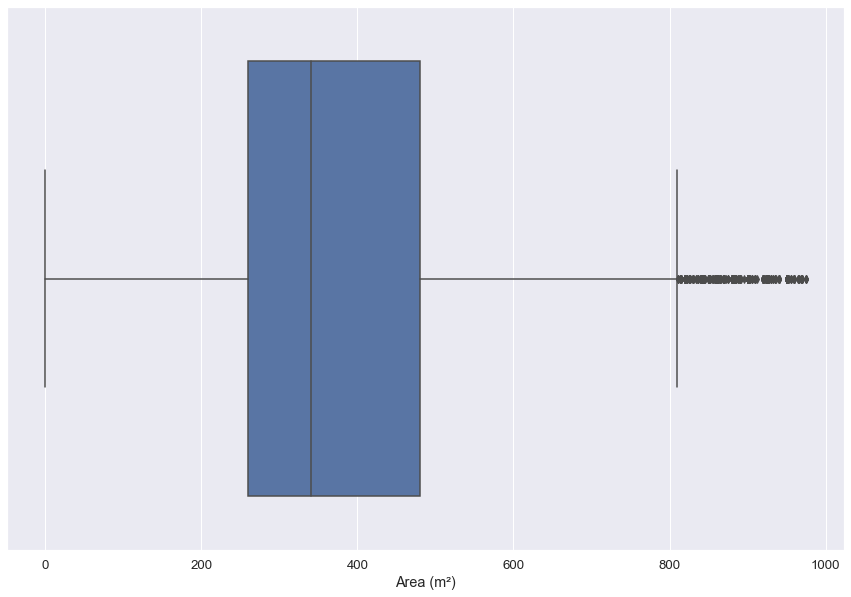

In [64]:
sns.boxplot(x="Area (m²)", data=df)
flt=df["Area (m²)"]<200
sns.scatterplot(x="Area (m²)", data=df)

In [65]:
# sns.plot(x="Area (m²)", data=df, si)

In [66]:
df[df['price']<2000_000]

,price,location,date,title,link,viwers,negotiable,Bedrooms,Bathrooms,Area (m²),...,Water,Elevator,Pool,Built,Pets,Kitchen,Maids,Electricity,Garden,Balcony
9,1700000,North Coast، Matruh,2022-03-10,فوكه باى شاليه للبيع,https://www.olx.com.eg/en/ad/-IDcHz08.html,108,1,2,3,95,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
19,280000,New Capital City، Cairo,2022-03-07,أحصل عأقوي3عروض من المقصد واستلم حالا بمقدم4%أ...,https://www.olx.com.eg/en/ad/3-4-10-IDcHbAm.html,186,0,1,1,382,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
22,1000000,New Capital City، Cairo,2022-03-06,فيلا مستقله استلام فوري في العاصمة الادارية ال...,https://www.olx.com.eg/en/ad/-IDcGZLF.html,160,0,3,1,350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,400000,New Cairo - El Tagamoa، Cairo,2022-03-11,تاون هاوس فيو مميز بالقاهرة الجديدة,https://www.olx.com.eg/en/ad/-IDcHJyH.html,38,0,2,1,201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,707059,New Capital City، Cairo,2022-03-07,فيلا تاون هاوس 271 للبيع بسعر حصرى بالعاصمه ال...,https://www.olx.com.eg/en/ad/271-10-IDcH6XO.html,69,0,2,2,271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21648,800000,Sheikh Zayed، Giza,2022-01-23,فيلا للبيع داخل بيفرلي هيلز,https://www.olx.com.eg/en/ad/-IDcBhyb.html,97,0,3,1,630,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21666,770000,6th of October، Giza,2022-01-23,تاون هاوس HADABA - من المالك - بدون أوفر - الق...,https://www.olx.com.eg/en/ad/hadaba-6-IDcBhdL....,226,0,2,2,250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21677,540000,Sheikh Zayed، Giza,2022-01-23,ارخص سعر متر في اول طرح في زايد الجديده,https://www.olx.com.eg/en/ad/-IDcBh97.html,18,0,1,2,203,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
21688,1000000,"6th of October, Giza",2022-01-23,Villa 500m with private lake in mountain view ...,https://www.olx.com.eg/en/ad/villa-500m-with-p...,5,0,4,6,500,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [67]:
xc=df.drop(df[df['Area (m²)']<180].index)

In [101]:
df.drop(df[(df['price']<200_000) | (df['Area (m²)']<200)].index,inplace=True)

In [69]:
xc=df.drop(df[(df['price']<2000_001) | (df['Area (m²)']<250) ].index)

In [70]:
idx = ["price","Area (m²)"]
outliers_indices = detect_outliers(xc, 0, idx)
xc.drop(outliers_indices,inplace=True,axis=0)

<AxesSubplot:xlabel='Area (m²)', ylabel='price'>

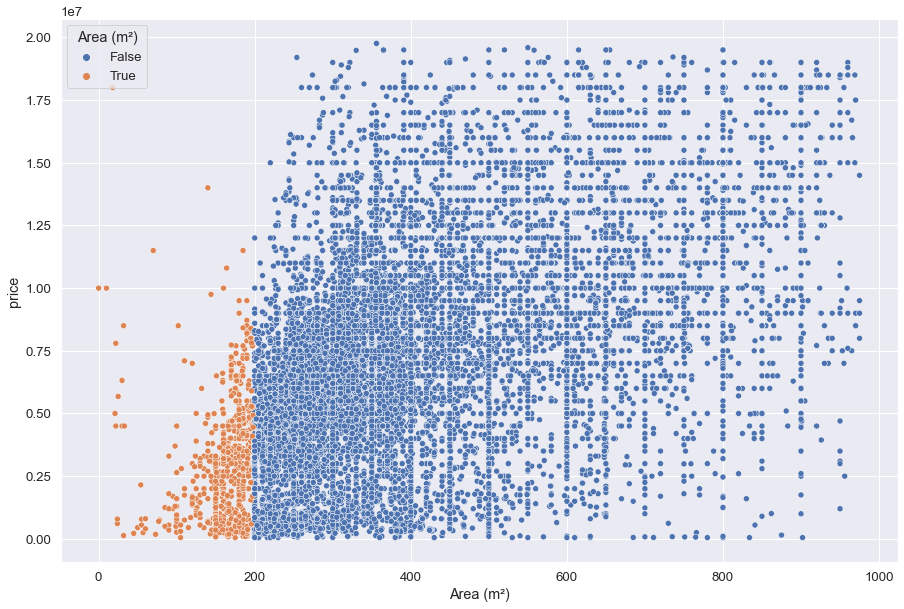

In [71]:
sns.scatterplot(x="Area (m²)",y='price', data=df, hue=flt)

In [72]:
# df[((df['Area (m²)']>250) & (df['Area (m²)']<800)) |( (df['price']<upper) & (df['price']>lower))]

In [106]:
df.describe()

,price,viwers,negotiable,Bedrooms,Bathrooms,Area (m²),Payment Option,Delivery Term,Furnished,Delivery Date,...,Water,Elevator,Pool,Built,Pets,Kitchen,Maids,Electricity,Garden,Balcony
count,1.846100e+04,18461.000000,18461.00000,18461.000000,18461.000000,18461.000000,18461.000000,10183.000000,11619.000000,13616.000000,...,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,7.177971e+06,57.703104,0.13385,2.021613,2.559720,400.371919,1.896539,2.019051,0.069627,1.417524,...,0.687673,0.234899,0.398940,0.263123,0.795341,0.263123,0.682670,0.675950,0.837900,0.864631
std,4.201673e+06,79.815485,0.34050,1.129348,1.822447,173.081769,0.629639,0.957879,0.254529,1.026973,...,0.463460,0.423951,0.489699,0.440345,0.403467,0.440345,0.465454,0.468036,0.368556,0.342130
min,2.000000e+05,2.000000,0.00000,1.000000,1.000000,200.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.350000e+06,16.000000,0.00000,1.000000,1.000000,266.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,6.530000e+06,34.000000,0.00000,2.000000,2.000000,350.000000,2.000000,2.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,9.500000e+06,65.000000,0.00000,3.000000,4.000000,496.000000,2.000000,3.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.976000e+07,1778.000000,1.00000,5.000000,6.000000,975.000000,3.000000,4.000000,1.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='Area (m²)', ylabel='price'>

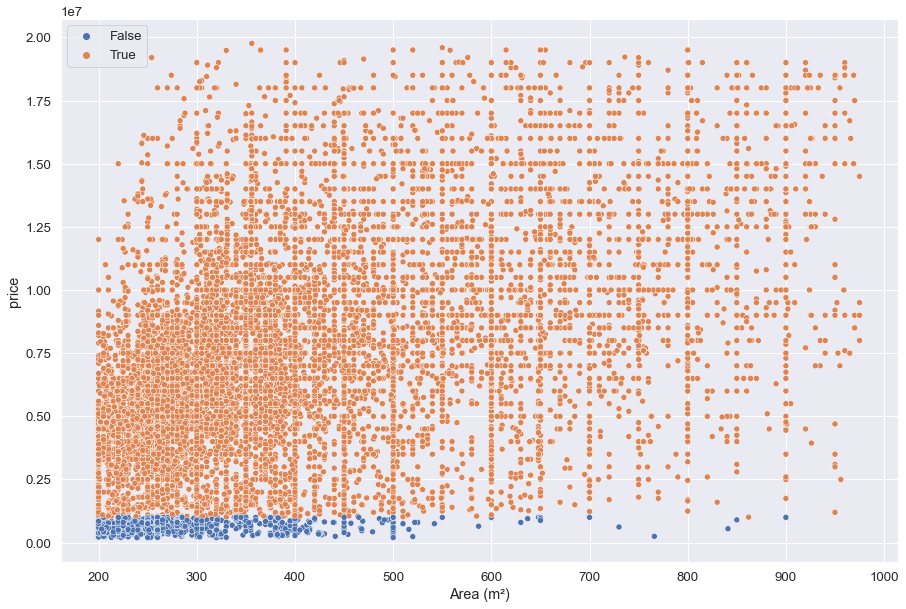

In [107]:
upper=20_000_000
lower=1000_000
flt_p=(df['price']<upper) & (df['price']>lower)
flt_a=(df['Area (m²)']>195) & (df['Area (m²)']<1000)
sns.scatterplot(x="Area (m²)",y='price', data=df, hue=flt_a & flt_p)

<AxesSubplot:xlabel='Area (m²)'>

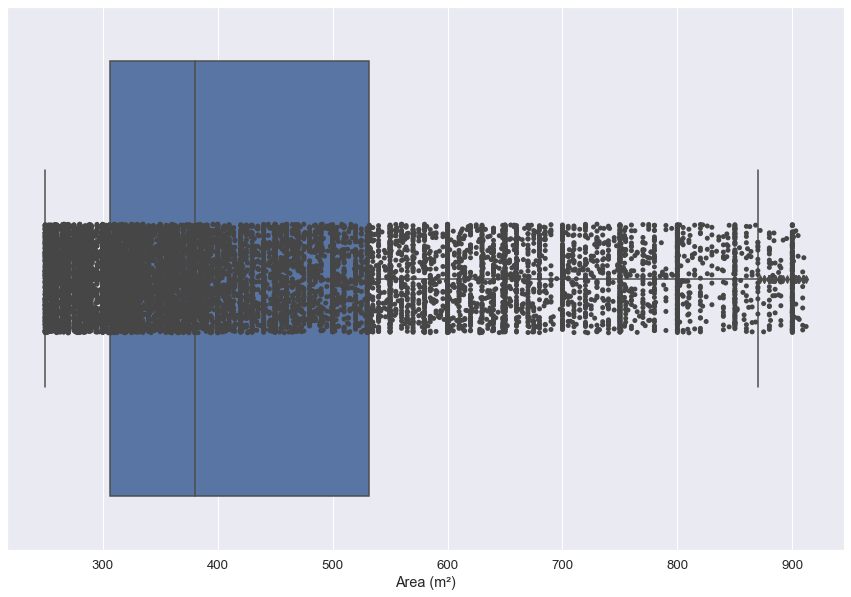

In [105]:
sns.boxplot(x="Area (m²)", data=xc)
sns.stripplot(x="Area (m²)", data=xc, color="#474646")

<AxesSubplot:xlabel='Area (m²)', ylabel='price'>

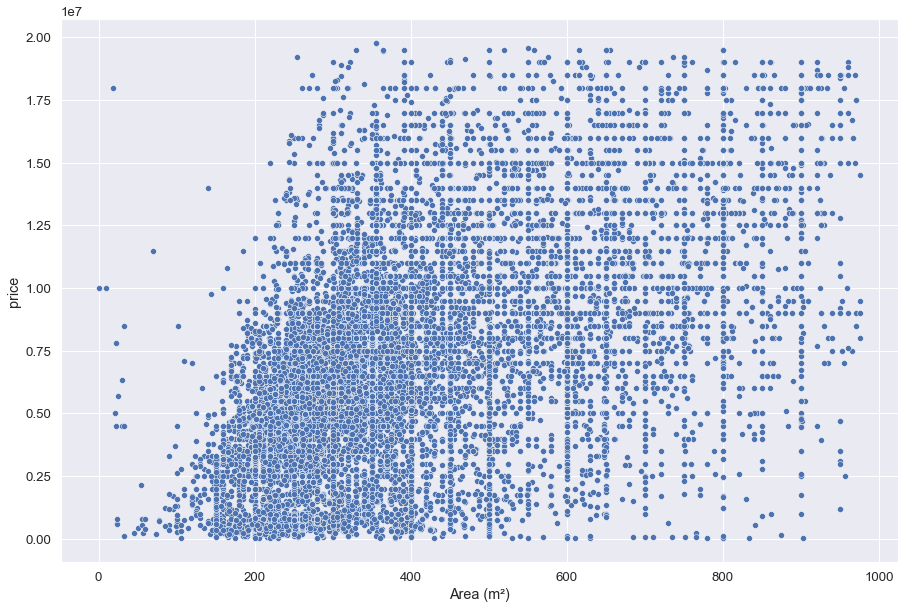

In [75]:
sns.scatterplot(x=df["Area (m²)"], y=df["price"])

In [76]:
df2=df[(df['price']<100002)]
df2['price']

47        86000
374       80000
1193      80000
1248      80000
1251     100000
1801      50000
1884      55555
2329      50000
2346     100000
2509      50000
2910      55000
3011     100000
3706      80000
4377     100000
4652      50000
5334      57000
5734      75000
6142      55555
7038     100000
7705     100000
8638      50000
8702      50000
8742     100000
9733     100000
9755      50000
9824     100000
10760    100000
10901     50000
11631     50000
12306    100000
12446     55000
13037    100000
13449     70000
13672    100000
13931    100000
14058     50000
14645     50000
14725     50000
14764     50000
14828     50000
15327     75000
15431     99000
16147     50000
16586    100000
16720     50000
17573    100000
19001    100000
19315    100000
19556    100000
19584    100000
19586     70000
20007     50000
20143     80000
20459     77000
21036     50000
21046     50000
21246    100000
21360     50000
Name: price, dtype: int64

<AxesSubplot:xlabel='price'>

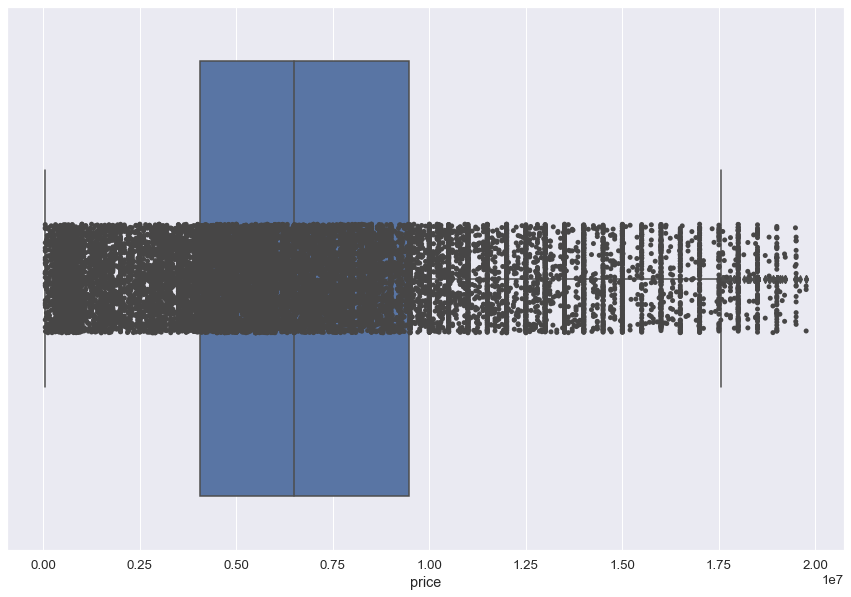

In [77]:
sns.boxplot(x='price', data=df)
sns.stripplot(x='price', data=df, color="#474646")

In [78]:
df['Delivery Term'].value_counts()

2.0    3897
1.0    3782
3.0    1932
4.0    1043
Name: Delivery Term, dtype: int64

In [79]:
df.isnull().sum()
df.reset_index(drop=True, inplace=True)

In [80]:
df.drop('Amenities',inplace=True,axis=1)

<AxesSubplot:xlabel='count', ylabel='Type'>

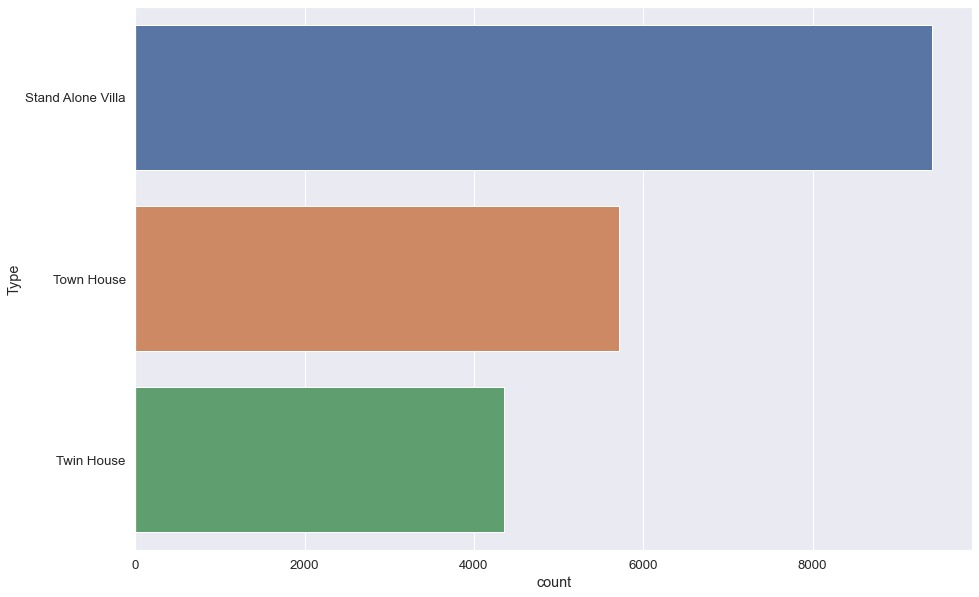

In [81]:
catgorical_columns=["Bedrooms","Bathrooms","Furnished","Type","cat","Delivery Term","Delivery Date","Payment Option","negotiable"]
sns.countplot(y='Type', data=df)


<AxesSubplot:xlabel='count', ylabel='Type'>

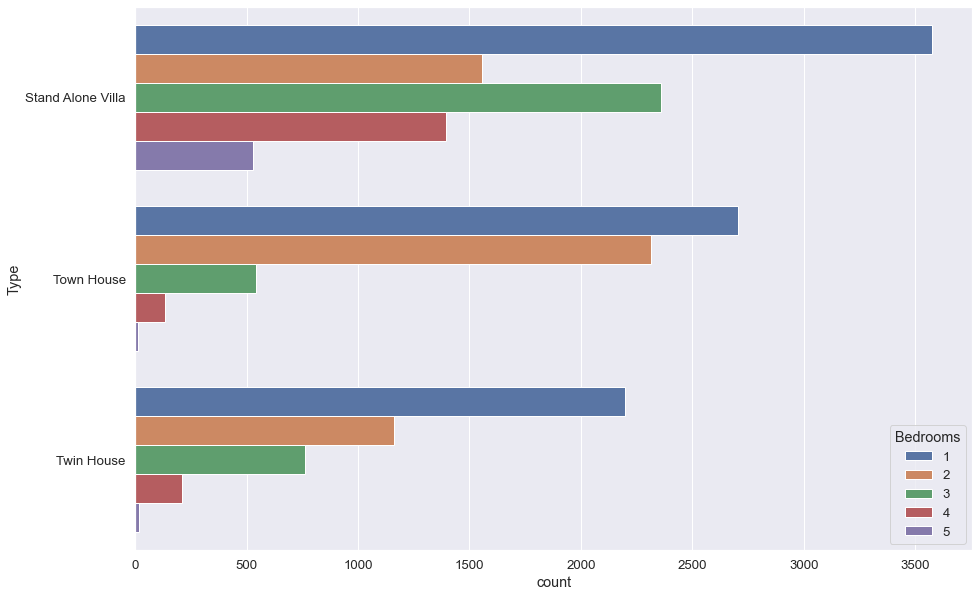

In [82]:
catgorical_columns=["Bedrooms","Bathrooms","Furnished","Type","cat","Delivery Term","Delivery Date","Payment Option","negotiable"]
sns.countplot(y='Type', data=df ,hue="Bedrooms")


<AxesSubplot:xlabel='count', ylabel='Type'>

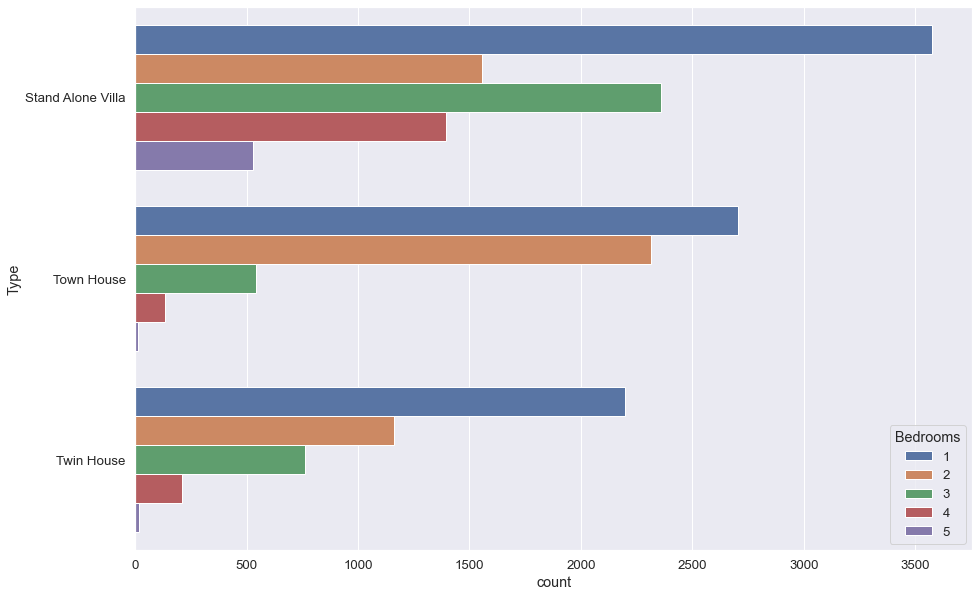

In [83]:
catgorical_columns=["Bedrooms","Bathrooms","Furnished","Type","cat","Delivery Term","Delivery Date","Payment Option","negotiable"]
sns.countplot(y='Type', data=df ,hue="Bedrooms")


<AxesSubplot:xlabel='count', ylabel='Type'>

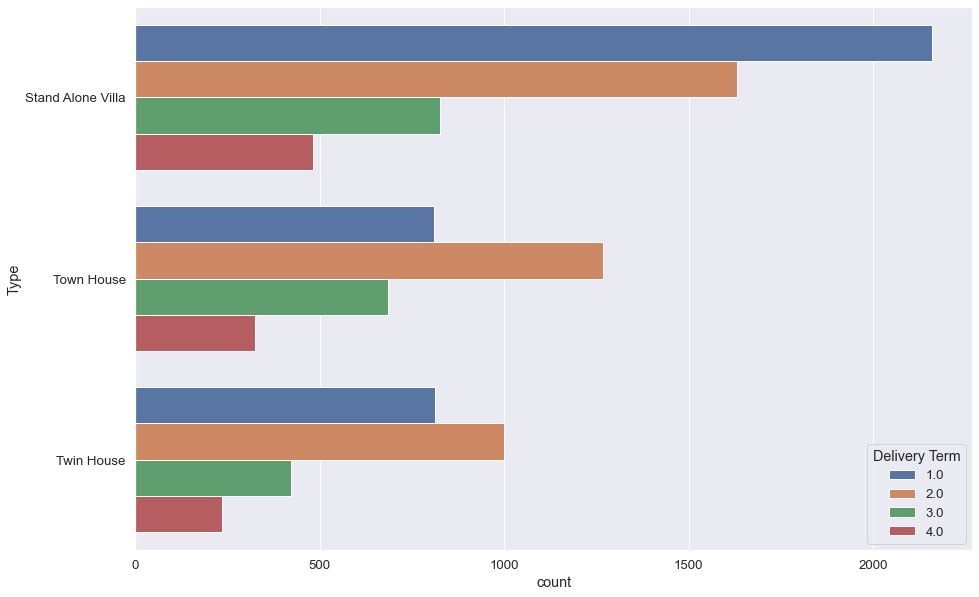

In [84]:
catgorical_columns=["Bedrooms","Bathrooms","Furnished","Type","cat","Delivery Term","Delivery Date","Payment Option","negotiable"]
sns.countplot(y='Type', data=df ,hue="Delivery Term")


<AxesSubplot:xlabel='count', ylabel='Type'>

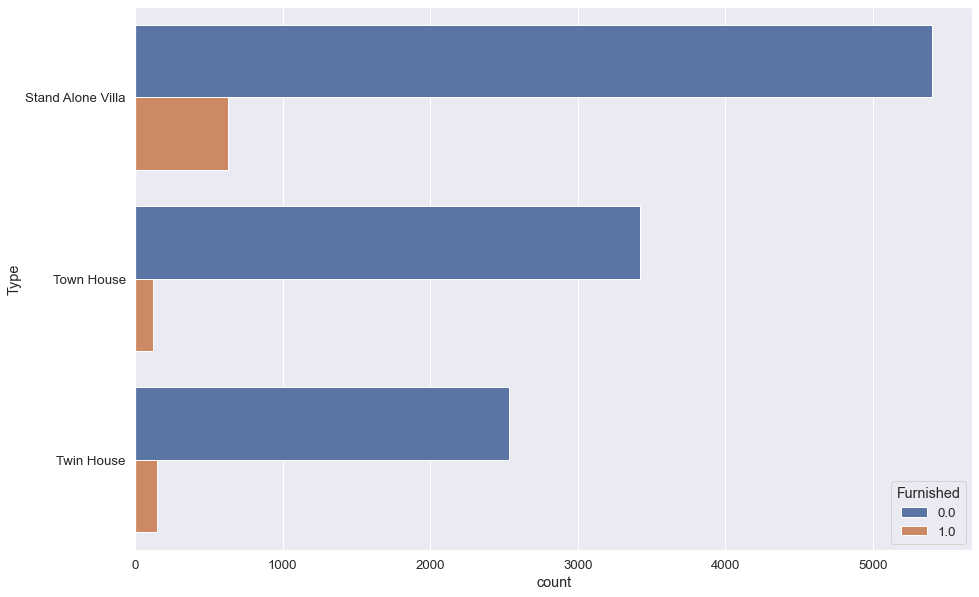

In [85]:
catgorical_columns=["Bedrooms","Bathrooms","Furnished","Type","cat","Delivery Term","Delivery Date","Payment Option","negotiable"]
sns.countplot(y='Type', data=df ,hue="Furnished")


In [86]:
# sns.jointplot(data=df, x="Area (m²)", y="price", kind="kde")

<AxesSubplot:xlabel='Area (m²)', ylabel='price'>

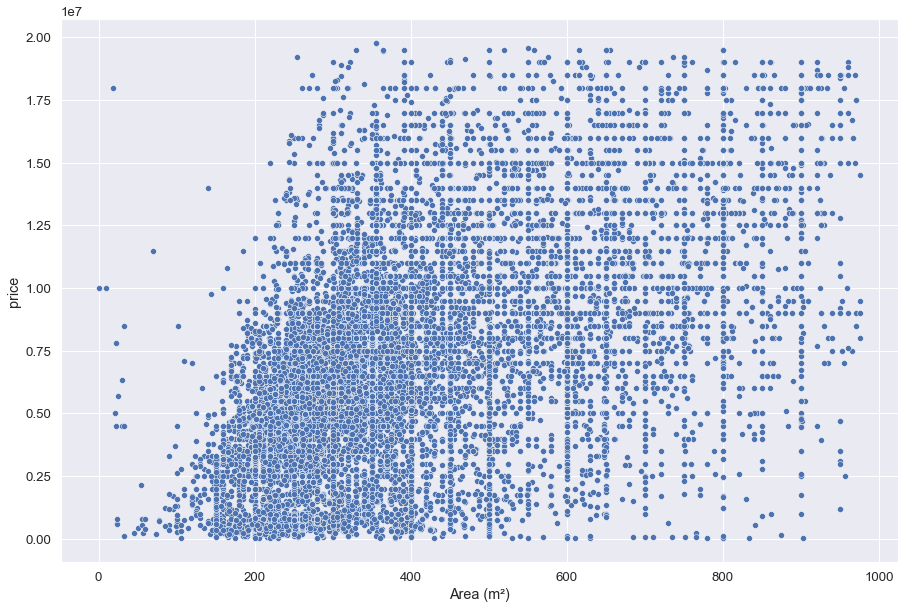

In [87]:
sns.scatterplot(x=df[ "Area (m²)"], y=df["price"])

<AxesSubplot:xlabel='price'>

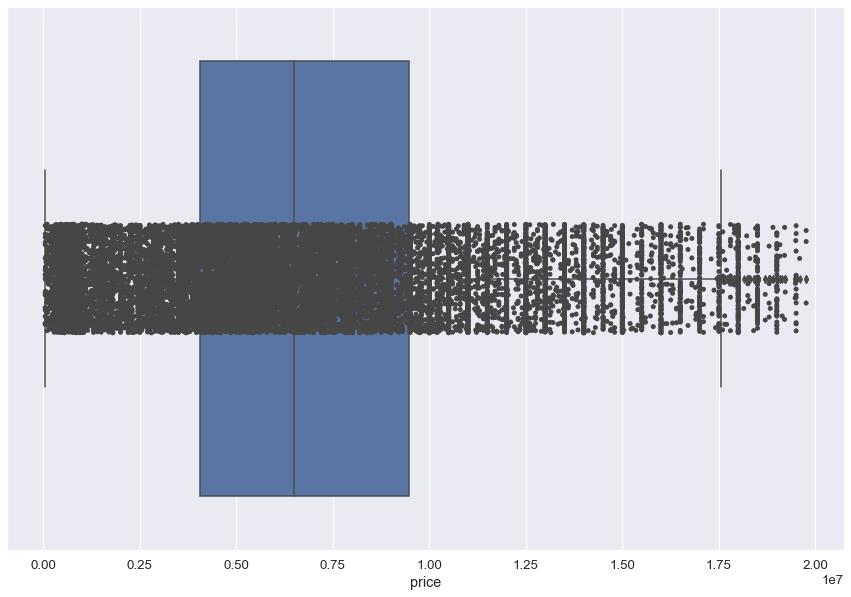

In [88]:
sns.boxplot(x='price', data=df)
sns.stripplot(x='price', data=df, color="#474646")

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19479 entries, 0 to 19478
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           19479 non-null  int64         
 1   location        19479 non-null  object        
 2   date            19479 non-null  datetime64[ns]
 3   title           19479 non-null  object        
 4   link            19479 non-null  object        
 5   viwers          19479 non-null  int32         
 6   negotiable      19479 non-null  int32         
 7   Bedrooms        19479 non-null  int64         
 8   Bathrooms       19479 non-null  int64         
 9   Area (m²)       19479 non-null  int32         
 10  Type            19479 non-null  object        
 11  Payment Option  19479 non-null  float64       
 12  Compound        12601 non-null  object        
 13  Delivery Term   10654 non-null  float64       
 14  Furnished       12258 non-null  float64       
 15  De

<AxesSubplot:xlabel='price', ylabel='Density'>

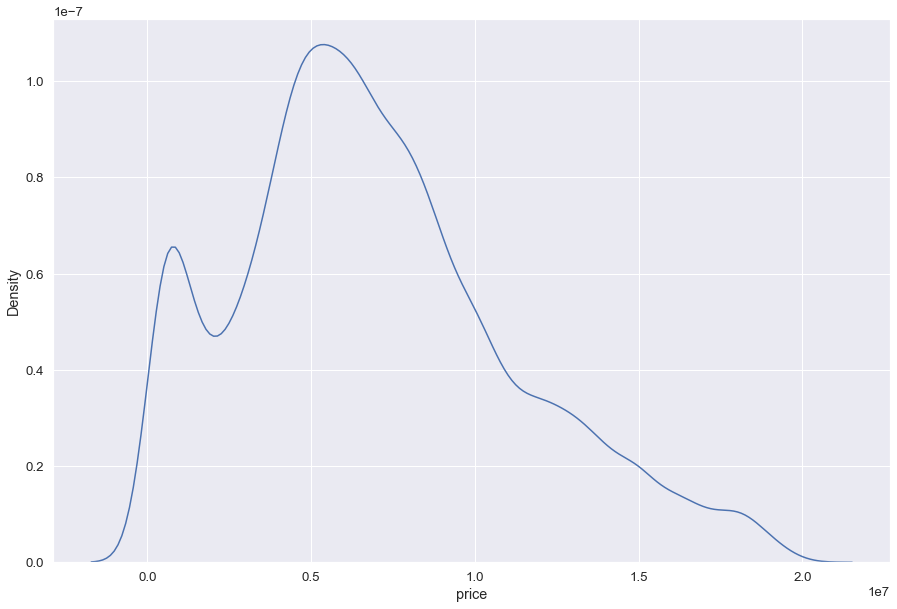

In [90]:
sns.kdeplot(data=df, x="price")

In [91]:
len(idx)

2

<AxesSubplot:xlabel='price'>

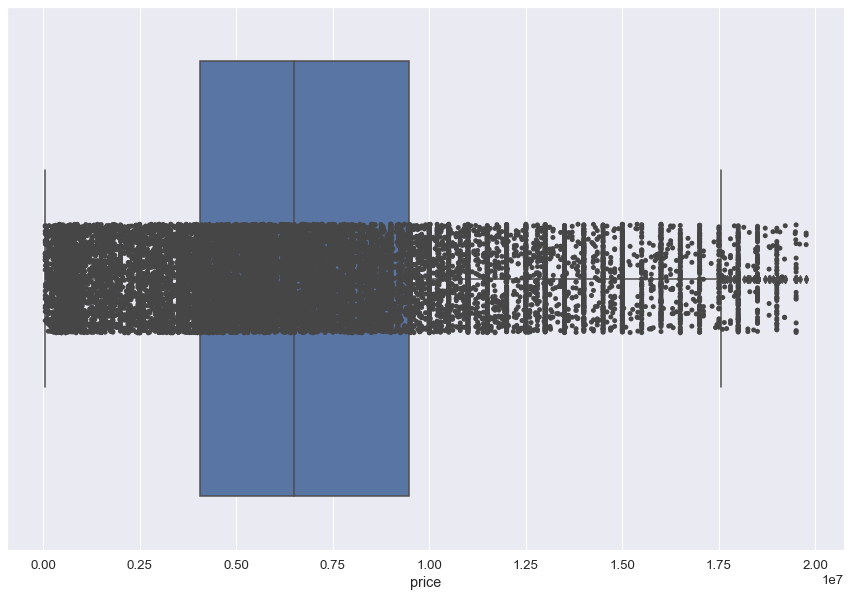

In [92]:
sns.boxplot(x='price', data=df)
sns.stripplot(x='price', data=df, color="#474646")

<AxesSubplot:xlabel='price', ylabel='Area (m²)'>

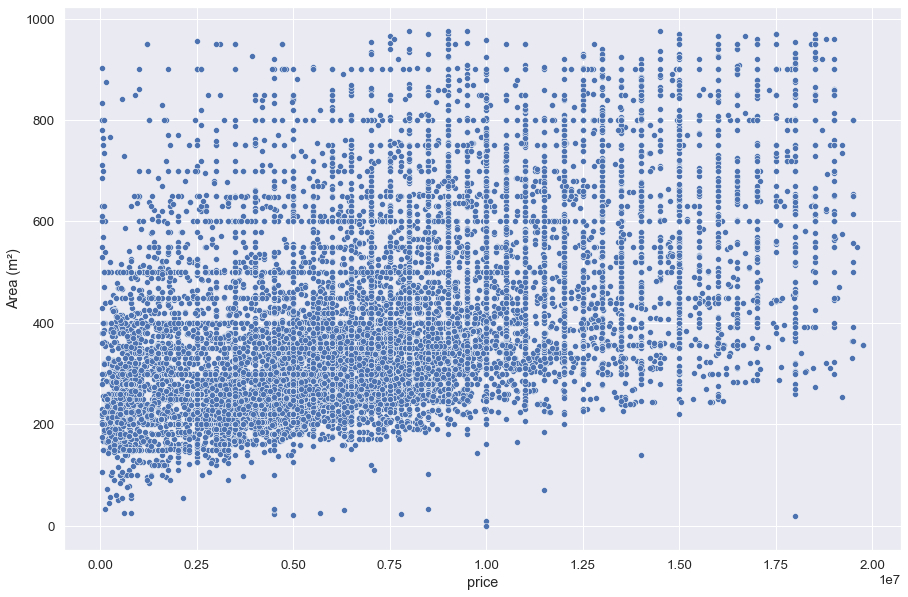

In [93]:
sns.scatterplot(x=df["price"], y=df["Area (m²)"])

<AxesSubplot:xlabel='Area (m²)', ylabel='Density'>

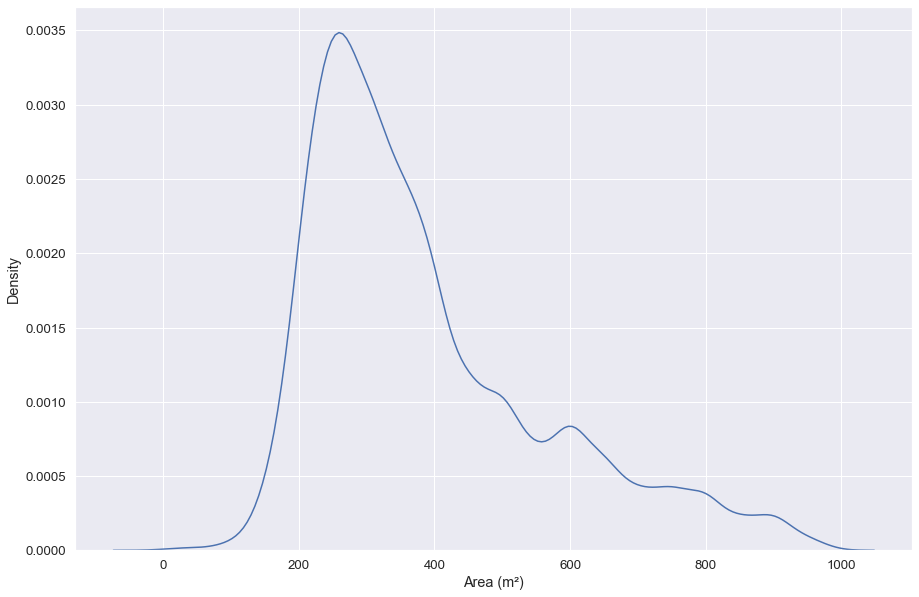

In [94]:
sns.kdeplot(data=df, x="Area (m²)")